<center><h1><b>Coffee Shop Sales</b></h1></center>

---

*Analyzed by: Dendi Apriyandi*


Dataset:
https://www.kaggle.com/datasets/divu2001/coffee-shop-sales-analysis

# Data Preparation

# Identification of Problems

## Problem Topics

Find the right and effective model to make `total_bill` predictions

# Data Overview

| **Column**            | **Description** |
|-----------------------|-----------------|
| **transaction_id**    | A unique identifier for each transaction. |
| **transaction_date**  | The date of the transaction in the format (DD-MM-YYYY). |
| **transaction_time**  | The time of the transaction in the format (HH:MM:SS). |
| **store_id**          | A unique identifier for the store where the transaction occurred. |
| **store_location**    | The physical location or region where the store is located. |
| **product_id**        | A unique identifier for each product involved in the transaction. |
| **transaction_qty**   | The number of products purchased in the transaction. |
| **unit_price**        | The price per unit of the product. |
| **Total_Bill**        | The total bill amount (transaction_qty × unit_price). |
| **product_category**  | The category of the product, such as "Electronics," "Clothing," or "Food." |
| **product_type**      | A subcategory or type within the product category. |
| **product_detail**    | Additional details or description of the specific product. |
| **Size**              | The size of the product (e.g., S, M, L, or specific size information). |
| **Month Name**        | The name of the month when the transaction took place (e.g., January, February). |
| **Day Name**          | The name of the day when the transaction occurred (e.g., Monday, Tuesday). |
| **Hour**              | The hour of the transaction in 24-hour format. |
| **Month**             | The numeric month (1 for January, 2 for February, etc.). |
| **Day of Week**       | A numeric representation of the day of the week (0 for Sunday, 1 for Monday, etc.). |


# Data Loading

This section is for data preparation before more and deeper
 data exploration

## Import Library

In [ ]:
import warnings  # Module to handle warnings
import pickle  # Module for saving and loading trained models or other objects

# Data manipulation and numerical computation libraries
import pandas as pd  # Library for handling structured data (DataFrame)
import numpy as np  # Library for numerical computations and array operations

# Data visualization libraries
import matplotlib.pyplot as plt  # Module for creating plots and visualizations
import seaborn as sns  # Library for statistical data visualization based on matplotlib

# Disable warnings for cleaner output
warnings.filterwarnings('ignore')

# Google Colab integration (if using Google Colab)
from google.colab import drive  # Module to access Google Drive in Colab

# Scikit-learn utilities
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV  # Model selection and evaluation
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Data preprocessing
from sklearn.compose import ColumnTransformer  # Preprocessing pipeline
from sklearn.pipeline import Pipeline  # Machine learning pipeline

# Machine learning models
from sklearn.tree import DecisionTreeRegressor  # Decision Tree Regressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Ensemble models
from sklearn.linear_model import LinearRegression  # Linear Regression model

# Model evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer


## Load Dataset

### From Google Drive

In [ ]:
# Force remount to refresh authentication
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Read the dataset from drive
df = pd.read_csv('/content/drive/MyDrive/Project (Portofolio)/Coffee Shop Sales/coffee-shop-sales.csv')  # Read the file after mounting

# Adjust Pandas settings to display all columns in the output
pd.set_option('display.max_columns', None)

# Display the first 5 rows of the DataFrame:
df.head()  # Show the first 5 rows to get an overview of the data

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


### From Local

In [ ]:
# # Adjust Pandas settings to display all columns in the output
# pd.set_option('display.max_columns', None)

# # Read DataFrame from CSV file:
# df = pd.read_csv('hr-analytics-employee-attrition-and-Performance.csv')  # Load data from 'hr-analytics-employee-attrition-and-Performance.csv' into a DataFrame

🔹`coffee-shop-sales.csv` dataset already loaded

### Create Copy of Dataset for Data Overview

In [ ]:
# Create a copy of the DataFrame to avoid modifying the original data
df_view = df.copy()

# Display the first 5 rows of the DataFrame:
df_view.head()  # Show the first 5 rows to get an overview of the data

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


## Column Handling

In [ ]:
# Function to convert column names to lowercase and replace spaces with underscores
def clean_column_names(df_view):
    new_columns = []
    for col in df_view.columns:
        new_col = col.lower().replace(' ', '_')
        new_columns.append(new_col)
    df_view.columns = new_columns
    return df_view

# Example usage:
df_view = clean_column_names(df_view)  # Assuming 'df_view' is your DataFrame
df_view.columns


Index(['transaction_id', 'transaction_date', 'transaction_time', 'store_id',
       'store_location', 'product_id', 'transaction_qty', 'unit_price',
       'total_bill', 'product_category', 'product_type', 'product_detail',
       'size', 'month_name', 'day_name', 'hour', 'month', 'day_of_week'],
      dtype='object')

## Number of Rows and Columns

In [ ]:
# Get the number of rows and columns:
num_rows, num_columns = df_view.shape  # Unpack the shape of the DataFrame into number of rows and columns

# Print the number of rows:
print("Number of rows:", num_rows)  # Output the number of rows

# Print the number of columns:
print("Number of columns:", num_columns)  # Output the number of columns

Number of rows: 149116
Number of columns: 18


## Data Information

In [ ]:
# Get a concise summary of the DataFrame:
df_view.info()  # Displays information about the DataFrame, including the number of non-null entries, data types, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   store_id          149116 non-null  int64  
 4   store_location    149116 non-null  object 
 5   product_id        149116 non-null  int64  
 6   transaction_qty   149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   total_bill        149116 non-null  float64
 9   product_category  149116 non-null  object 
 10  product_type      149116 non-null  object 
 11  product_detail    149116 non-null  object 
 12  size              149116 non-null  object 
 13  month_name        149116 non-null  object 
 14  day_name          149116 non-null  object 
 15  hour              149116 non-null  int64  
 16  month             14

## Missing Value

In [ ]:
# Count the number of missing values in each column:
df_view.isnull().sum()  # Returns the total number of missing (null) values for each column in the DataFrame

,0
transaction_id,0
transaction_date,0
transaction_time,0
store_id,0
store_location,0
product_id,0
transaction_qty,0
unit_price,0
total_bill,0
product_category,0


🔹There is no missing value in each columns from dataset

## Data Type

In [ ]:
# Get the data types of each column:
df_view.dtypes  # Displays the data type of each column in the DataFrame

,0
transaction_id,int64
transaction_date,object
transaction_time,object
store_id,int64
store_location,object
product_id,int64
transaction_qty,int64
unit_price,float64
total_bill,float64
product_category,object


🔹`transaction_date` and `transaction_time` have wrong data type. therefore, it must to be change.

In [ ]:
# Convert 'transaction_date' to datetime objects
df_view['transaction_date'] = pd.to_datetime(df_view['transaction_date'], format='%d-%m-%Y')

# Convert 'transaction_time' to datetime objects
df_view['transaction_time'] = pd.to_datetime(df_view['transaction_time'], format='%H:%M:%S').dt.time

In [ ]:
# Checking the conversion
df_view[['transaction_date', 'transaction_time']].head()

,transaction_date,transaction_time
0,2023-06-01,11:33:29
1,2023-06-02,11:18:24
2,2023-06-02,12:02:45
3,2023-06-02,19:39:47
4,2023-06-03,12:24:57


## Summary Statistics for Categorical Columns

In [ ]:
# Get descriptive statistics for categorical columns and transpose the result:
df_view.describe(include=object).T  # Displays summary statistics for categorical columns, transposed for easier viewing

,count,unique,top,freq
transaction_time,149116,25762,09:31:15,41
store_location,149116,3,Hell's Kitchen,50735
product_category,149116,9,Coffee,58416
product_type,149116,29,Brewed Chai tea,17183
product_detail,149116,45,Our Old Time Diner Blend,8660
size,149116,4,Regular,45789
month_name,149116,6,June,35352
day_name,149116,7,Friday,21701


In [ ]:
df_view.describe(exclude=object).T  # Displays summary statistics for all columns, transposed for easier viewing

,count,mean,min,25%,50%,75%,max,std
transaction_id,149116.0,74737.371872,1.0,37335.75,74727.5,112094.25,149456.0,43153.600016
transaction_date,149116,2023-04-15 11:50:32.173609984,2023-01-01 00:00:00,2023-03-06 00:00:00,2023-04-24 00:00:00,2023-05-30 00:00:00,2023-06-30 00:00:00,NaN
store_id,149116.0,5.342063,3.0,3.0,5.0,8.0,8.0,2.074241
product_id,149116.0,47.918607,1.0,33.0,47.0,60.0,87.0,17.93002
transaction_qty,149116.0,1.438276,1.0,1.0,1.0,2.0,8.0,0.542509
unit_price,149116.0,3.382219,0.8,2.5,3.0,3.75,45.0,2.658723
total_bill,149116.0,4.686367,0.8,3.0,3.75,6.0,360.0,4.227099
hour,149116.0,11.73579,6.0,9.0,11.0,15.0,20.0,3.764662
month,149116.0,3.988881,1.0,3.0,4.0,5.0,6.0,1.673091
day_of_week,149116.0,2.982336,0.0,1.0,3.0,5.0,6.0,1.99665


🔹The tabel above shows information about summary statistics of dataset (but only for numerical column)

## Columns

In [ ]:
# Get the column names of the DataFrame:
df_view.columns # Returns a list of column names in the DataFrame

Index(['transaction_id', 'transaction_date', 'transaction_time', 'store_id',
       'store_location', 'product_id', 'transaction_qty', 'unit_price',
       'total_bill', 'product_category', 'product_type', 'product_detail',
       'size', 'month_name', 'day_name', 'hour', 'month', 'day_of_week'],
      dtype='object')

## Central Tendency Measures for 'Total_Bill'

In [ ]:
# Calculate central tendency measures for 'total_bill'
mean_total_bill = df_view['total_bill'].mean()
median_total_bill = df_view['total_bill'].median()
mode_total_bill = df_view['total_bill'].mode().values[0]

print(f"Mean of total_bill: {mean_total_bill}")
print(f"Median of total_bill: {median_total_bill}")
print(f"Mode of total_bill: {mode_total_bill}")

Mean of total_bill: 4.686367190643527
Median of total_bill: 3.75
Mode of total_bill: 3.0


In [ ]:
# Calculate skewness and kurtosis for 'total_bill'
skewness_total_bill = df_view['total_bill'].skew()
kurtosis_total_bill = df_view['total_bill'].kurt()

print(f"Skewness of total_bill: {skewness_total_bill}")
print(f"Kurtosis of total_bill: {kurtosis_total_bill}")

Skewness of total_bill: 41.745899391974305
Kurtosis of total_bill: 3359.7545885486634


🔹 **Skewness > 0** means the data is skewed to the right (right-skewed). A value of **41.75** is very high, indicating that there are some values significantly higher than the majority of the data.  

🔹 **High kurtosis (>10)** means the distribution has very heavy tails (Leptokurtic). A kurtosis value of **3359.75** is extremely high, indicating that most of the data is concentrated around the mean, but there are outliers that are far from the majority of the data.

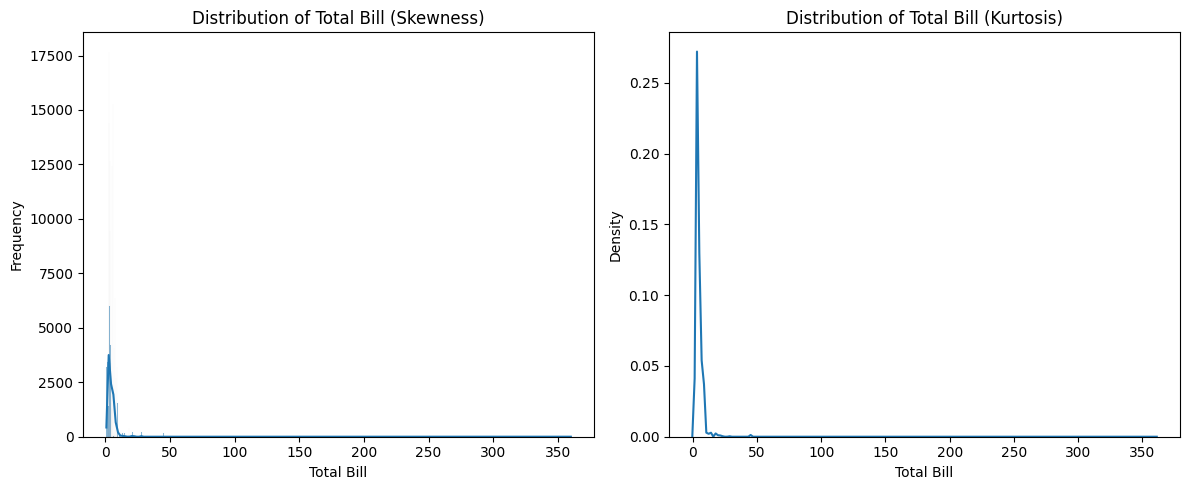

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Skewness plot
sns.histplot(df_view['total_bill'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Total Bill (Skewness)')
axes[0].set_xlabel('Total Bill')
axes[0].set_ylabel('Frequency')

# Kurtosis plot
sns.kdeplot(df_view['total_bill'], ax=axes[1])
axes[1].set_title('Distribution of Total Bill (Kurtosis)')
axes[1].set_xlabel('Total Bill')
axes[1].set_ylabel('Density')


plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

## Unique Value

In [ ]:
df_view.nunique() # Returns the number of unique values for each column in the DataFrame

,0
transaction_id,149116
transaction_date,181
transaction_time,25762
store_id,3
store_location,3
product_id,80
transaction_qty,6
unit_price,41
total_bill,75
product_category,9


🔹`transaction_id` columns has high cardinality, it should be delete

In [ ]:
# Drop the specified columns
df_view = df_view.drop(['transaction_id'], axis=1)

## Duplicated Rows

In [ ]:
# Count the number of duplicated rows in the DataFrame:
num_duplicated_rows = df_view.duplicated().sum()  # Calculate the number of duplicated rows

# Print the count of duplicated rows:
print("Duplicated Rows:", num_duplicated_rows)  # Output the count of duplicated rows

Duplicated Rows: 398


🔹There's duplicated rows we should drop it for better analysis

In [ ]:
# Remove duplicate rows from the DataFrame
df_view.drop_duplicates(inplace=True)  # 'inplace=True' applies changes directly to df_view

In [ ]:
# Count the number of duplicated rows in the DataFrame:
num_duplicated_rows = df_view.duplicated().sum()  # Calculate the number of duplicated rows

# Print the count of duplicated rows:
print("Duplicated Rows:", num_duplicated_rows)  # Output the count of duplicated rows

Duplicated Rows: 0


## Data Preprocessing

### Correlation Check

In [ ]:
# Calculate the correlation matrix only for numerical columns target  Total Bill

corr_matrix = df_view.corr(numeric_only=True) # Include numeric_only=True
corr_total_bill = corr_matrix['total_bill'].sort_values(ascending=False)
corr_total_bill

,total_bill
total_bill,1.000000
unit_price,0.685657
transaction_qty,0.356018
store_id,0.004639
month,0.001271
day_of_week,-0.001420
hour,-0.014155
product_id,-0.167210


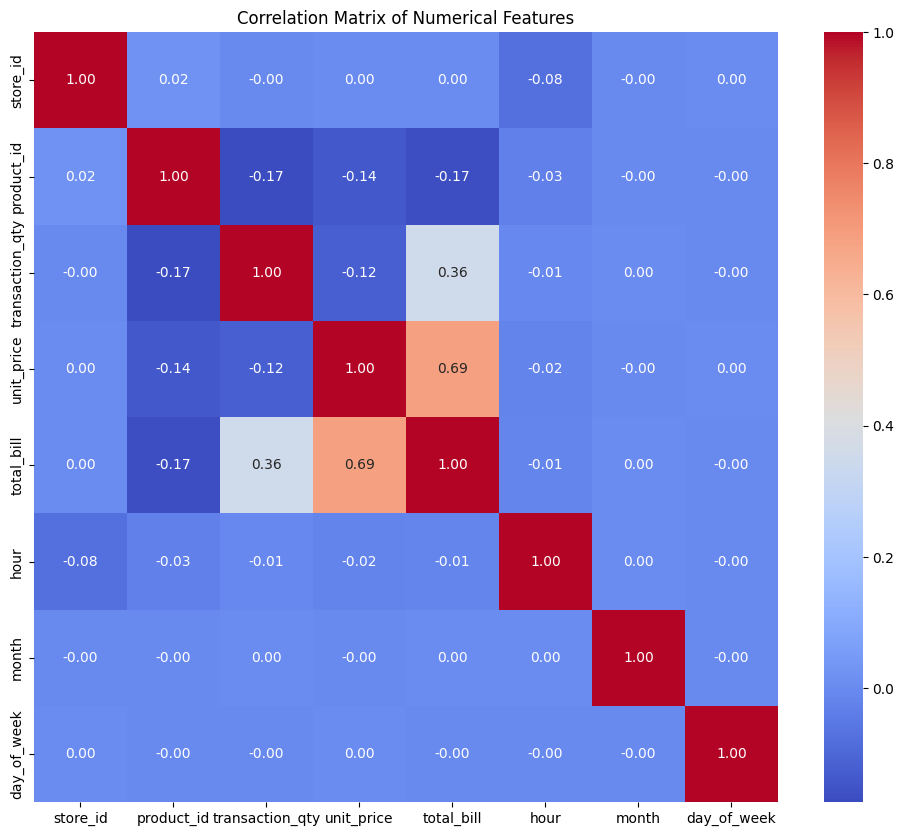

In [ ]:
# Heatmap correlation for numeric columns

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Feature Engineering

## Create Copy of Dataset for FE

In [ ]:
# Create a copy of the DataFrame to avoid modifying the original data
df_fe = df_view.copy()

# Display the first 5 rows of the DataFrame:
df_fe.head()  # Show the first 5 rows to get an overview of the data

,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,total_bill,product_category,product_type,product_detail,size,month_name,day_name,hour,month,day_of_week
0,2023-06-01,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,2023-06-02,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,2023-06-02,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,2023-06-02,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,2023-06-03,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


## Split Feature

## Selecting Features and Target Variable

🔹Create new variable for columns after deleted without `total_bill` (because `total_bill` has already deleted)

In [ ]:
# Define Numerical Coloumn and Categorical Column
num_cols=['transaction_qty','unit_price','month','day_of_week','hour']
cat_cols=['store_location','product_category','product_type','product_detail','size','month_name','day_name']

# Define Categorical Column (Nominal and Ordinal)
cat_cols_o=['size', 'month_name', 'day_name']
cat_cols_n=['store_location','product_category','product_type','product_detail']

In [ ]:
# Define X (features) and y (target variable)
X = df_fe.drop(['total_bill'], axis=1)
y = df_fe['total_bill']

## Split Train Set and Test Set

In [ ]:
# Splitting between `X` and `y`
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1,stratify=y)
print('Size Train Set : ', X_train.shape)
print('Size Test Set  : ', X_test.shape)

Size Train Set :  (118974, 16)
Size Test Set  :  (29744, 16)


In [ ]:
# X_train_num = X_train.select_dtypes(include=np.number)
# X_test_num = X_test.select_dtypes(include=np.number)

In [ ]:
X_train_num = X_train[num_cols]
X_test_num = X_test[num_cols]

### Skewness of X_train_num

In [ ]:
# Skewness
for i in num_cols: # Iterate over column names in X_train_num
    skew = X_train_num[i].skew()

    print('Skewness', i ,'is', skew )

Skewness transaction_qty is 0.7978842831926451
Skewness unit_price is 8.445030821728306
Skewness month is -0.4134562598754006
Skewness day_of_week is 0.010488017371485086
Skewness hour is 0.4063513234137234


#### Handling Outlier

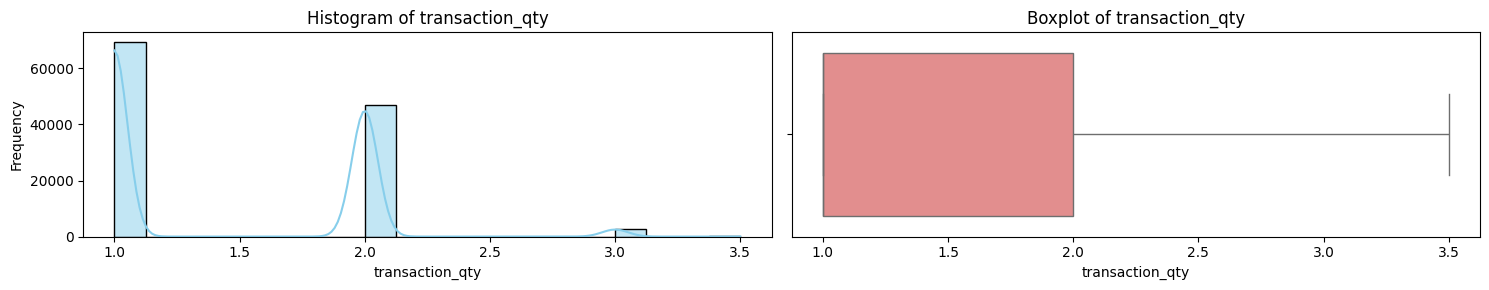

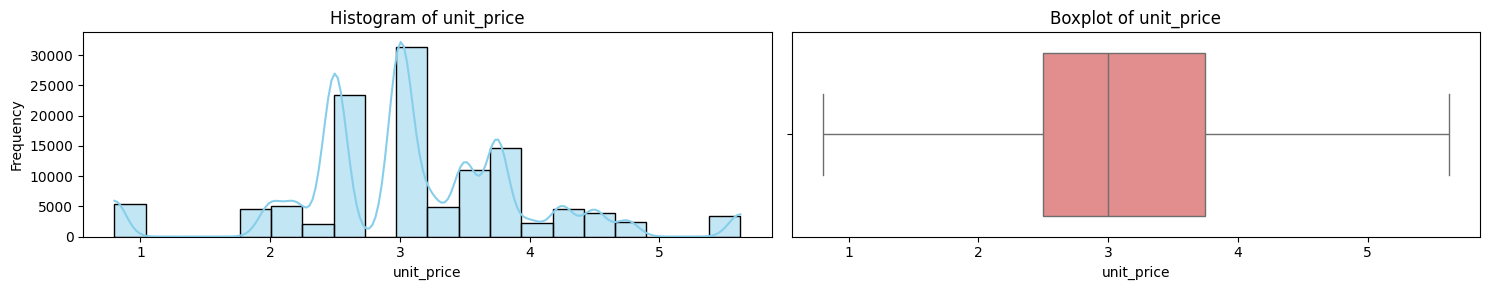

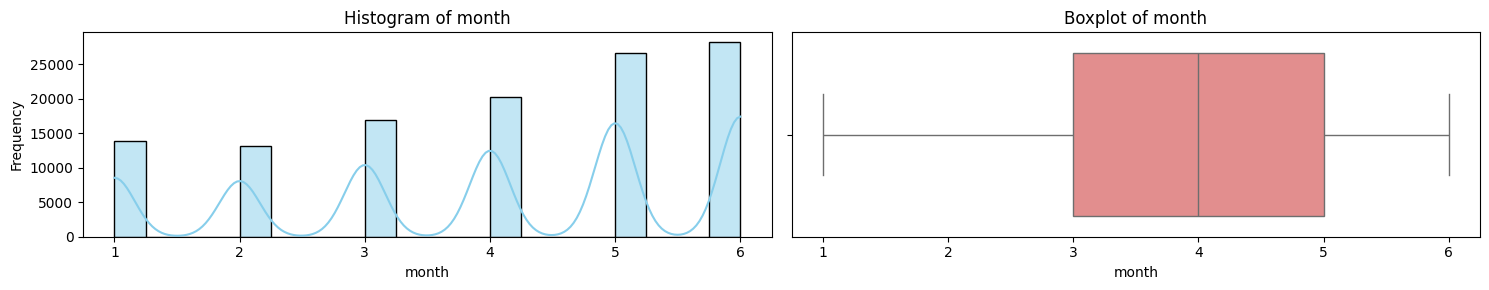

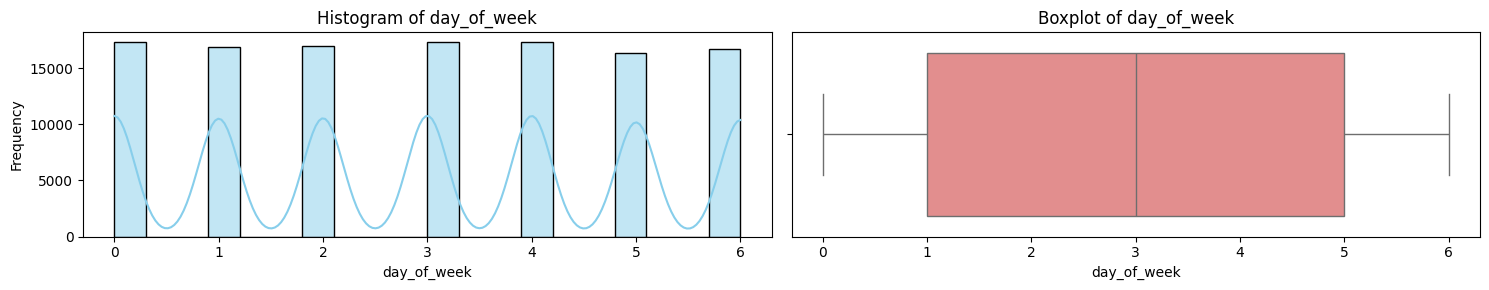

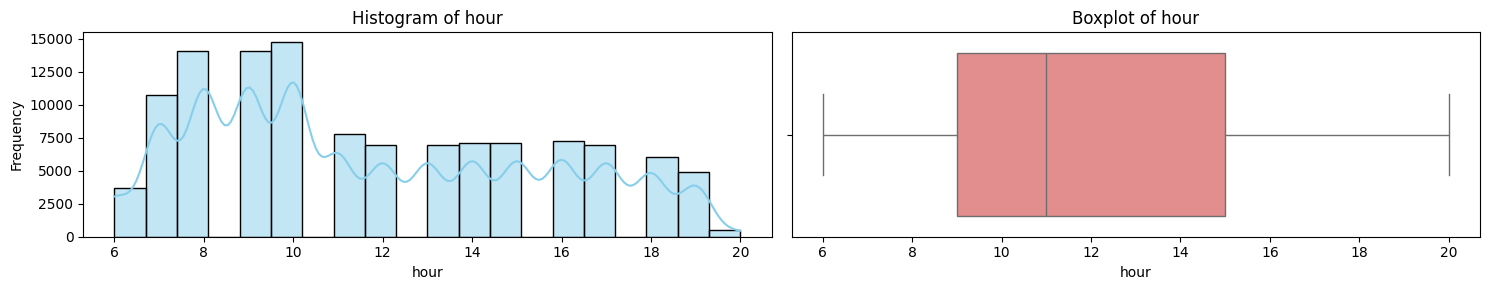

In [ ]:
def handle_outliers_tukey(X_train_num, column):
  """
  Handles outliers in a DataFrame column using Tukey's rule.

  Args:
      X_train_num: The DataFrame containing the column.
      column: The name of the column to handle outliers for.

  Returns:
      A DataFrame with outliers replaced by the appropriate boundary values.
  """

  Q1 = X_train_num[column].quantile(0.25)
  Q3 = X_train_num[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  X_train_num_fe = X_train_num.copy()
  X_train_num_fe[column] = np.where(X_train_num_fe[column] < lower_bound, lower_bound,
                           np.where(X_train_num_fe[column] > upper_bound, upper_bound,
                                    X_train_num_fe[column]))
  return X_train_num_fe

# Apply Tukey's rule to each numerical column in X_train_num
for column in X_train_num.columns:
  X_train_num = handle_outliers_tukey(X_train_num, column)

# Visualize the distribution of each numerical column using histograms and boxplots
for column in X_train_num.columns:
  plt.figure(figsize=(15, 3))  # Wider figure, shorter height

  # Histogram
  plt.subplot(1, 2, 1)
  sns.histplot(X_train_num[column], bins=20, kde=True, color='skyblue', edgecolor='black')  # Use seaborn histplot with KDE
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')

  # Boxplot
  plt.subplot(1, 2, 2)
  sns.boxplot(x=X_train_num[column], color='lightcoral')
  plt.title(f'Boxplot of {column}')
  plt.xlabel(column)

  plt.tight_layout()
  plt.show()

### Skewness of X_test_num

In [ ]:
# Skewness
for i in num_cols :
    skew = X_test_num[i].skew()

    print('Skewness', i ,'is', skew )

Skewness transaction_qty is 0.7883938475075124
Skewness unit_price is 8.449050573761903
Skewness month is -0.4170981125296144
Skewness day_of_week is 0.0063606087239210145
Skewness hour is 0.4056280414069705


#### Handling Outlier

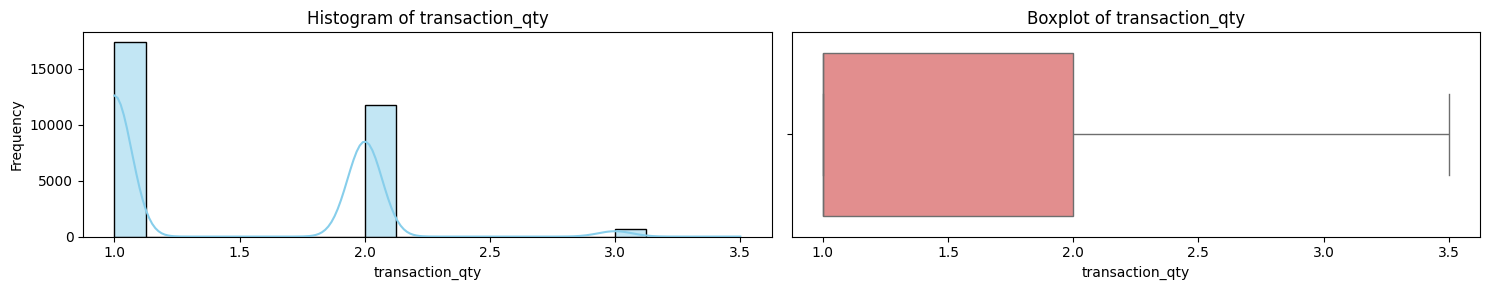

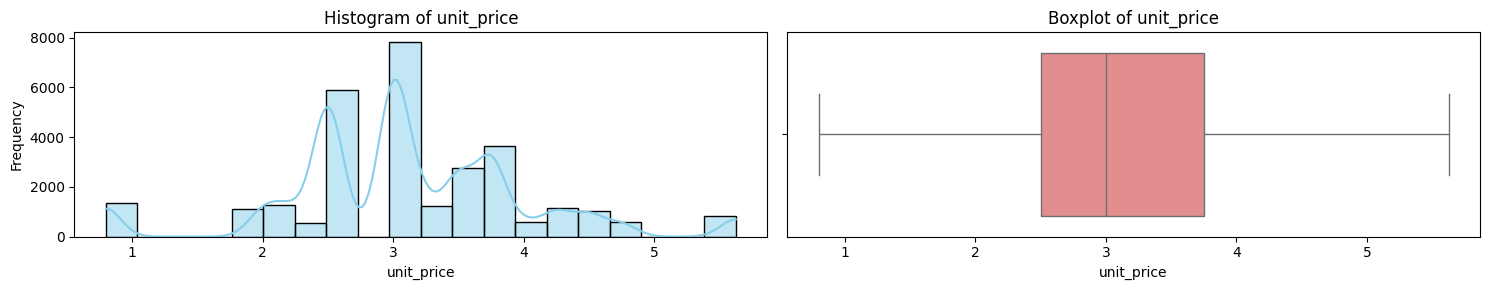

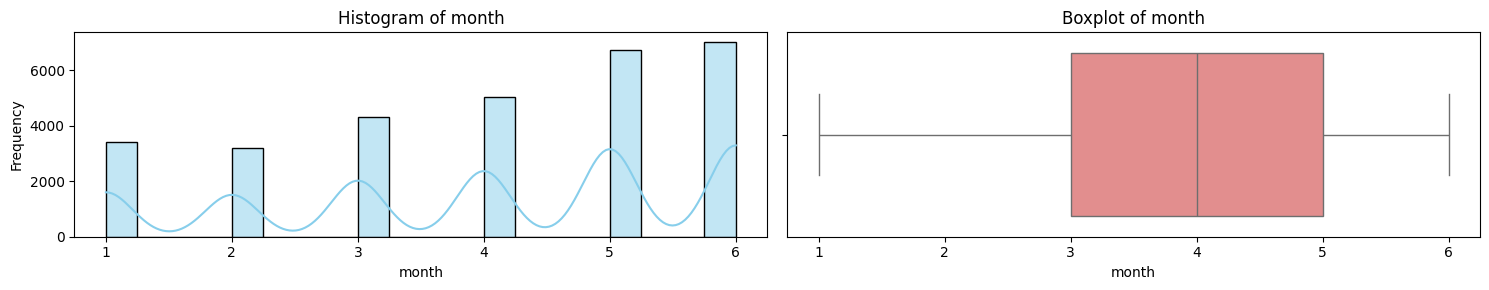

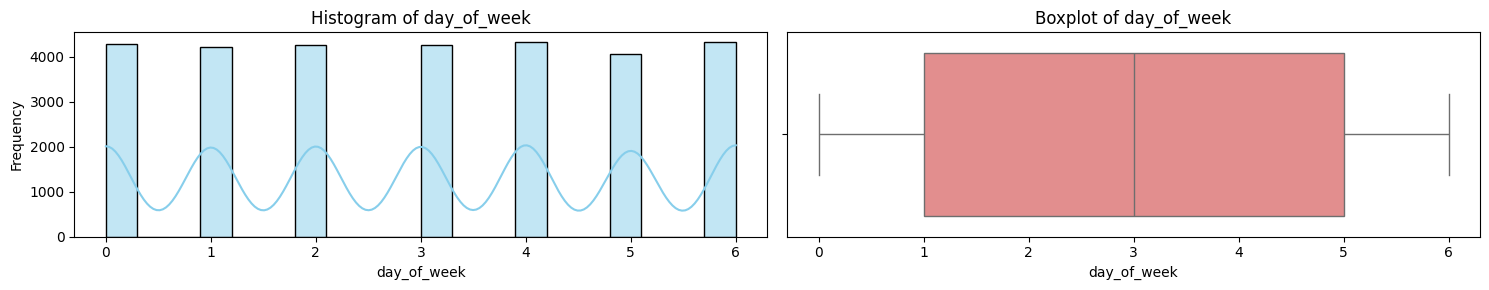

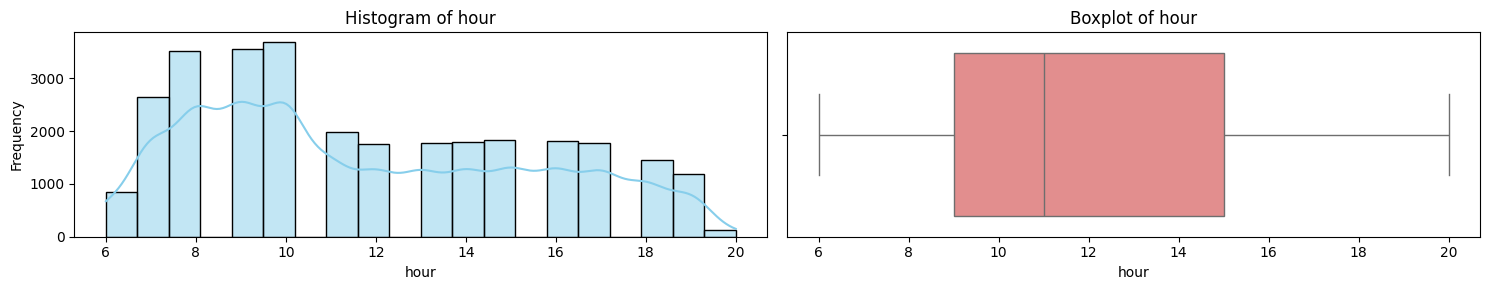

In [ ]:
def handle_outliers_tukey(X_test_num, column):
  """
  Handles outliers in a DataFrame column using Tukey's rule.

  Args:
      X_test_num: The DataFrame containing the column.
      column: The name of the column to handle outliers for.

  Returns:
      A DataFrame with outliers replaced by the appropriate boundary values.
  """

  Q1 = X_test_num[column].quantile(0.25)
  Q3 = X_test_num[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  X_test_num_fe = X_test_num.copy()
  X_test_num_fe[column] = np.where(X_test_num_fe[column] < lower_bound, lower_bound,
                           np.where(X_test_num_fe[column] > upper_bound, upper_bound,
                                    X_test_num_fe[column]))
  return X_test_num_fe

# Apply Tukey's rule to each numerical column in X_test_num
for column in X_test_num.columns:
  X_test_num = handle_outliers_tukey(X_test_num, column)

# Visualize the distribution of each numerical column using histograms and boxplots
for column in X_test_num.columns:
  plt.figure(figsize=(15, 3))  # Wider figure, shorter height

  # Histogram
  plt.subplot(1, 2, 1)
  sns.histplot(X_test_num[column], bins=20, kde=True, color='skyblue', edgecolor='black')  # Use seaborn histplot with KDE
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')

  # Boxplot
  plt.subplot(1, 2, 2)
  sns.boxplot(x=X_test_num[column], color='lightcoral')
  plt.title(f'Boxplot of {column}')
  plt.xlabel(column)

  plt.tight_layout()
  plt.show()


## Feature Scalling

### Standar Scaler for Numerical Column

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform X_train_num, then only transform X_test_num
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

# Save the scaled results as a DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_cols, index=X_test.index)

In [ ]:
X_train_scaled.head()

,transaction_qty,unit_price,month,day_of_week,hour
39226,-0.813578,0.712086,-1.784391,0.010421,-0.991867
1679,-0.813578,-0.107599,-0.589908,0.511558,1.394844
113337,1.039412,1.804999,-1.784391,-0.490716,-0.991867
21809,-0.813578,-0.654056,1.201817,0.511558,0.068893
6153,-0.813578,-0.107599,0.604576,1.513833,-0.461487


In [ ]:
X_test_scaled.head()

,transaction_qty,unit_price,month,day_of_week,hour
11201,-0.813578,-0.107599,-1.187149,0.511558,1.660034
71457,-0.813578,1.804999,0.604576,-0.991854,0.068893
90668,1.039412,-0.599410,0.007334,1.012695,-0.196297
86826,-0.813578,1.258543,1.201817,1.513833,-0.991867
40173,-0.813578,0.712086,0.604576,-0.490716,-0.726677


### Missing Value in Train Set and Test Set

In [ ]:
# Check for missing values in X_train
print("Missing values in X_train  :", X_train_num.isnull().sum().sum())

# Check for missing values in X_test
print("Missing values in X_test   :", X_test_num.isnull().sum().sum())

# Check for missing values in y_test
print("Missing values in y_test   :", y_test.isnull().sum().sum())

# Check for missing values in y_train
print("Missing values in y_train  :", y_train.isnull().sum().sum())

Missing values in X_train  : 0
Missing values in X_test   : 0
Missing values in y_test   : 0
Missing values in y_train  : 0


# Model Definition

In [ ]:
# Model definitions
model_dt = DecisionTreeRegressor()  # Decision Tree Regressor
model_rf = RandomForestRegressor()  # Random Forest Regressor
model_boost = GradientBoostingRegressor()  # Gradient Boosting Regressor
model_linreg = LinearRegression()  # Linear Regression

# Model Training

🔹Because the target column `total_bill` is a continuous number, so we use regression model

## Baseline Model

In [ ]:
# Results container
result = []

# List of regression models
models = [
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Linear Regression', LinearRegression())
]

# Looping through each model to fit, predict, and collect results
for name, model in models:
    # Fit the model on the training data
    model.fit(X_train_scaled, y_train)  # X_train_scaled karena regresi ga perlu resampling

    # Predict on training and test sets
    train_predictions = model.predict(X_train_scaled)
    test_predictions = model.predict(X_test_scaled)

    # Compute regression metrics
    mae_train = mean_absolute_error(y_train, train_predictions)
    mae_test = mean_absolute_error(y_test, test_predictions)

    mse_train = mean_squared_error(y_train, train_predictions)
    mse_test = mean_squared_error(y_test, test_predictions)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    r2_train = r2_score(y_train, train_predictions)
    r2_test = r2_score(y_test, test_predictions)

    # Insert results into the list
    result.append({
        'Model': name,
        'MAE - Train': mae_train,
        'MAE - Test': mae_test,
        'MSE - Train': mse_train,
        'MSE - Test': mse_test,
        'RMSE - Train': rmse_train,
        'RMSE - Test': rmse_test,
        'R² - Train': r2_train,
        'R² - Test': r2_test
    })

# Convert the results list to a Pandas DataFrame and display it
result_df = pd.DataFrame(result)
result_df

,Model,MAE - Train,MAE - Test,MSE - Train,MSE - Test,RMSE - Train,RMSE - Test,R² - Train,R² - Test
0,Decision Tree,0.155828,0.196158,1.684741,5.131496,1.297976,2.265280,0.906101,0.711589
1,Random Forest,0.162131,0.192479,2.029078,3.103816,1.424457,1.761765,0.886910,0.825553
2,Gradient Boosting,0.211093,0.213536,2.606783,2.774777,1.614553,1.665766,0.854711,0.844046
3,Linear Regression,0.778152,0.777017,11.874803,11.780309,3.445984,3.432246,0.338159,0.337898


## Cross Validation

In [ ]:
# Results container
result = []

# List of regression models
models = [
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Linear Regression', LinearRegression())
]

# Custom scoring function for cross-validation (using negative MAE for proper scoring direction)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Loop through each model to train and evaluate with cross-validation
for name, model in models:
    # Perform 5-fold cross-validation on the training data (using negative MAE)
    cv_mae_train = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring=mae_scorer)

    # Fit the model on the entire training data
    model.fit(X_train_scaled, y_train)

    # Predict on the test set
    test_predictions = model.predict(X_test_scaled)

    # Calculate evaluation metrics on the test set
    mae_test = mean_absolute_error(y_test, test_predictions)
    mse_test = mean_squared_error(y_test, test_predictions)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, test_predictions)

    # Append results for each model
    result.append({
        'Model': name,
        'Average MAE (CV) - Train Set': -cv_mae_train.mean(),  # Convert back to positive MAE
        'MAE - Test Set': mae_test,
        'MSE - Test Set': mse_test,
        'RMSE - Test Set': rmse_test,
        'R² - Test Set': r2_test
    })

# Convert results to DataFrame and display
result_df = pd.DataFrame(result)
result_df

,Model,Average MAE (CV) - Train Set,MAE - Test Set,MSE - Test Set,RMSE - Test Set,R² - Test Set
0,Decision Tree,0.208804,0.196158,5.131496,2.265280,0.711589
1,Random Forest,0.207126,0.193149,3.245513,1.801531,0.817589
2,Gradient Boosting,0.222633,0.213536,2.774777,1.665766,0.844046
3,Linear Regression,0.778498,0.777017,11.780309,3.432246,0.337898


## Top 3 Models

In [ ]:
# Sort the DataFrame by 'Average MAE (CV) - Train Set' in ascending order (smaller MAE is better)
top_3_models = result_df.sort_values('Average MAE (CV) - Train Set', ascending=True).head(3)

# Display the top-3 models
print("Top-3 best models based on average MAE (CV) on the training set:")
top_3_models


Top-3 best models based on average MAE (CV) on the training set:


,Model,Average MAE (CV) - Train Set,MAE - Test Set,MSE - Test Set,RMSE - Test Set,R² - Test Set
1,Random Forest,0.207126,0.193149,3.245513,1.801531,0.817589
0,Decision Tree,0.208804,0.196158,5.131496,2.265280,0.711589
2,Gradient Boosting,0.222633,0.213536,2.774777,1.665766,0.844046


## Hyperparameter Tuning

In [ ]:
# Define the hyperparameter grids for regression models
rf_param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

gb_param_grid = {
    'n_estimators': [100, 500],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0],
    'max_features': [None, 'sqrt', 'log2']
}

dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Prepare models and their corresponding parameter grids
models_params = [
    ('Random Forest', RandomForestRegressor(random_state=42), rf_param_grid),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42), gb_param_grid),
    ('Decision Tree', DecisionTreeRegressor(random_state=42), dt_param_grid)
]

# Results container
all_results_tuning = []

# Loop through each model
for name, model, param_grid in models_params:
    num_combinations = 1
    for param_list in param_grid.values():
        num_combinations *= len(param_list)

    n_iter_search = min(50, num_combinations)

    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    random_search = RandomizedSearchCV(estimator=model,
                                       param_distributions=param_grid,
                                       n_iter=n_iter_search,  # Adjusted line
                                       cv=cv,
                                       random_state=42,
                                       n_jobs=-1,
                                       verbose=1,
                                       scoring='neg_mean_absolute_error')  # Change to MAE for regression

    # Fit the model on scaled training data (no resampling for regression)
    try:
        random_search.fit(X_train_scaled, y_train)
    except ValueError as e:
        print(f"Error during fitting {name}: {e}")
        continue

    # Get the best estimator
    best_model = random_search.best_estimator_

    # Predict on training and test sets
    y_pred_train = best_model.predict(X_train_scaled)
    y_pred_test = best_model.predict(X_test_scaled)

    # Calculate evaluation metrics
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # Store the results
    all_results_tuning.append({
        'Model': name,
        'Train MAE': mae_train,
        'Test MAE': mae_test,
        'Train RMSE': rmse_train,
        'Test RMSE': rmse_test,
        'Train R²': r2_train,
        'Test R²': r2_test,
        'Best Params': random_search.best_params_
    })

# Convert results to DataFrame and display
results_df_tuning = pd.DataFrame(all_results_tuning)

      # Display the results to the user
results_df_tuning


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


,Model,Train MAE,Test MAE,Train RMSE,Test RMSE,Train R²,Test R²,Best Params
0,Random Forest,0.169402,0.186765,1.382996,2.205363,0.893397,0.726644,"{'n_estimators': 1000, 'min_samples_split': 2,..."
1,Gradient Boosting,0.164838,0.188836,1.340262,1.967293,0.899883,0.782476,"{'subsample': 1.0, 'n_estimators': 500, 'min_s..."
2,Decision Tree,0.179128,0.189345,1.812344,2.085473,0.816934,0.755557,"{'min_samples_split': 10, 'min_samples_leaf': ..."


In [ ]:
# Sort the DataFrame by 'Test R²' in descending order; the best parameters will be at the top
results_df_sorted = results_df_tuning.sort_values(by='Test R²', ascending=False)

# Extract the top row
best_model_row = results_df_sorted.iloc[0]

# Get the model name and best parameters
best_model_name = best_model_row['Model']
best_model_params = best_model_row['Best Params']

print(f"The model with the highest Test R² is {best_model_name} with parameters: {best_model_params}")

The model with the highest Test R² is Gradient Boosting with parameters: {'subsample': 1.0, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 5, 'learning_rate': 0.1}


In [ ]:
# Assuming results_df_sorted contains the results from hyperparameter tuning
best_gb_row = results_df_sorted[results_df_sorted['Model'] == 'Gradient Boosting'].iloc[0]
best_gb_params = best_gb_row['Best Params']

# Instantiate a new GradientBoostingRegressor with the best parameters
best_gb_model = GradientBoostingRegressor(**best_gb_params, random_state=42)

# Fit the model to the scaled training data
best_gb_model.fit(X_train_scaled, y_train)

# Show the best parameters

best_gb_model

GradientBoostingRegressor(max_depth=5, n_estimators=500, random_state=42)

🔹After did deeper analyze, the best model is Gradient Booster

# Model Evaluation

GB - MAE - Train Set  :  0.16483761393707091
GB - MSE - Train Set  :  1.7963029732615827
GB - RMSE - Train Set :  1.340262277788039
GB - R² Score - Train Set :  0.8998832269872508 

GB - MAE - Test Set  :  0.18883561763756926
GB - MSE - Test Set  :  3.870240805861396
GB - RMSE - Test Set :  1.9672927605878583
GB - R² Score - Test Set :  0.7824764762571932 



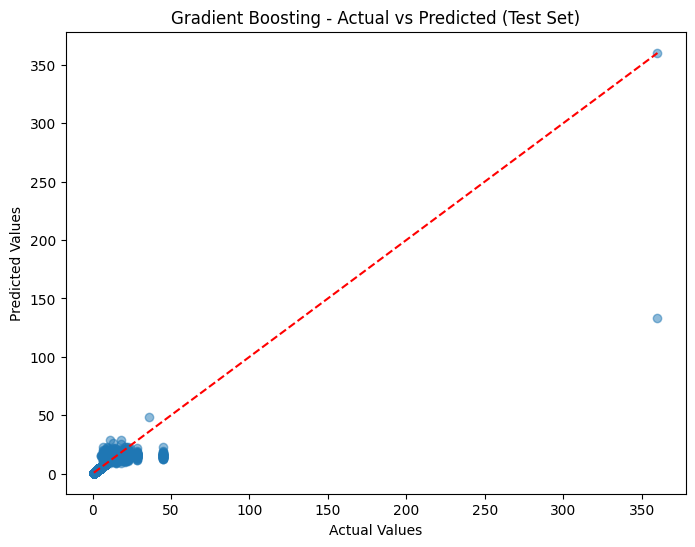

In [ ]:
# Predict on the training set and evaluate
y_pred_train_finals_gb = best_gb_model.predict(X_train_scaled)

print('GB - MAE - Train Set  : ', mean_absolute_error(y_train, y_pred_train_finals_gb))
print('GB - MSE - Train Set  : ', mean_squared_error(y_train, y_pred_train_finals_gb))
print('GB - RMSE - Train Set : ', np.sqrt(mean_squared_error(y_train, y_pred_train_finals_gb)))
print('GB - R² Score - Train Set : ', r2_score(y_train, y_pred_train_finals_gb), '\n')

# Predict on the test set and evaluate
y_pred_test_finals_gb = best_gb_model.predict(X_test_scaled)

print('GB - MAE - Test Set  : ', mean_absolute_error(y_test, y_pred_test_finals_gb))
print('GB - MSE - Test Set  : ', mean_squared_error(y_test, y_pred_test_finals_gb))
print('GB - RMSE - Test Set : ', np.sqrt(mean_squared_error(y_test, y_pred_test_finals_gb)))
print('GB - R² Score - Test Set : ', r2_score(y_test, y_pred_test_finals_gb), '\n')

# Scatter plot: Actual vs Predicted (Test Set)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_finals_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting - Actual vs Predicted (Test Set)')
plt.show()


# Scoring

🔹Compare baseline score with best parameter (Gradient Boosting)

## Baseline Model Vs. Best Model

In [ ]:
# Initialize the best Gradient Boosting model
best_gb_model = GradientBoostingRegressor(random_state=42, **best_gb_params)

# Fit the model
best_gb_model.fit(X_train_scaled, y_train)

# Predict on training and test sets
y_pred_train = best_gb_model.predict(X_train_scaled)
y_pred_test = best_gb_model.predict(X_test_scaled)

# Dictionary to store all reports
all_reports = {}

def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, model_name):
    score_reports = {
        'Train - MAE': mean_absolute_error(y_train, y_pred_train),
        'Train - MSE': mean_squared_error(y_train, y_pred_train),
        'Train - RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'Train - R² Score': r2_score(y_train, y_pred_train),
        'Test - MAE': mean_absolute_error(y_test, y_pred_test),
        'Test - MSE': mean_squared_error(y_test, y_pred_test),
        'Test - RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'Test - R² Score': r2_score(y_test, y_pred_test),
    }
    all_reports[model_name] = score_reports
    return all_reports

# Generate the performance report for the best Gradient Boosting model
all_reports = performance_report(
    all_reports,
    y_train,
    y_pred_train,
    y_test,
    y_pred_test,
    'Best Model - Gradient Boosting'
)

# Convert the dictionary to a DataFrame for better readability
pd.DataFrame(all_reports)


,Best Model - Gradient Boosting
Train - MAE,0.164838
Train - MSE,1.796303
Train - RMSE,1.340262
Train - R² Score,0.899883
Test - MAE,0.188836
Test - MSE,3.870241
Test - RMSE,1.967293
Test - R² Score,0.782476


## Gradient Boosting Regressor

In [ ]:
# Generate the performance report for the best Gradient Boosting model
all_reports = performance_report(
    all_reports,
    y_train,
    y_pred_train_finals_gb,  # Change to final Gradient Boosting predictions
    y_test,
    y_pred_test_finals_gb,  # Change to final Gradient Boosting predictions
    'GradientBoostingRegressor - gb'
)

# Convert the dictionary to a DataFrame for better readability
pd.DataFrame(all_reports)


,Best Model - Gradient Boosting,GradientBoostingRegressor - gb
Train - MAE,0.164838,0.164838
Train - MSE,1.796303,1.796303
Train - RMSE,1.340262,1.340262
Train - R² Score,0.899883,0.899883
Test - MAE,0.188836,0.188836
Test - MSE,3.870241,3.870241
Test - RMSE,1.967293,1.967293
Test - R² Score,0.782476,0.782476


From the metrics provided, **Gradient Boosting Regressor** model is **not overly overfitting**, but there is an indication of **slight overfitting**. Here’s why:

 **1️⃣ Train vs. Test Comparison**  
- **Train R² Score** = **0.899** (very high)  
- **Test R² Score** = **0.782** (still fairly high, but drops significantly from training)  

**➡️ There is a noticeable gap (~0.12) between Train and Test R².**  
   This suggests the model has learned a bit too much from the training data but still generalizes reasonably well to the test set.

 **2️⃣ Error Metrics Comparison (MAE, MSE, RMSE)**  
- **Train RMSE** = **1.34**, **Test RMSE** = **1.97**  
- **Train MSE** = **1.79**, **Test MSE** = **3.87**  
- **Train MAE** = **0.164**, **Test MAE** = **0.188**  

**➡️ The test set error is higher than the training set, but not drastically.**  
   If the model were severely overfitting, the test error would be much larger.

# Model Saving

In [ ]:
# Save the best Gradient Boosting model to a file
filename = 'best_gb_model.sav'
pickle.dump(best_gb_model, open(filename, 'wb'))


---

# Conclusion

✅ **Not severely overfitting, but slightly more fitted to the training set** than the test set.  
✅ **The model still generalizes quite well on the test set**, as R² remains relatively high (>0.75).  
⚠️ **However, to improve generalization, you can try:**  
   - **Reducing `max_depth`** in Gradient Boosting  
   - **Increasing `min_samples_split`** to make the model less complex  
   - **Using Early Stopping** to prevent the model from training too long  